# Procesamiento de imagen satelital


- **Autor:** Johan Sebastian Peña Orozco
- **Fecha:** 8/5/2018
- **Universidad Autonoma de Manizales**  


Este es un documento donde se muestra una imagen satelital de una parte de una ciudad, donde podemos ver unos edificios y unas zonas verdes a sus alrededores.

podemos observar el cambio de las tonalidades de color. Acontinuacion podemos ver como es el proceso.



In [ ]:
import skimage

### Primer paso: importar la imagen 

descargué una imagen donde se lograra observar desde arriba los edificios, las calles y las zonas verdes .Esta imagen se guarda como  **opt.gif**.

Principalmente usaremos scikit-image en esta demostración. Primero, usaremos skimage.io.imread para leer la imagen en la memoria. La imagen se puede trazar fácilmente usando la función imshow () de matplotlib. Podemos importar matplotlib, numpy y un puñado de otras bibliotecas científicas usan la función de magia en línea de% pylab.

### Paso 2 : Propiedades de la imagen 

Populating the interactive namespace from numpy and matplotlib


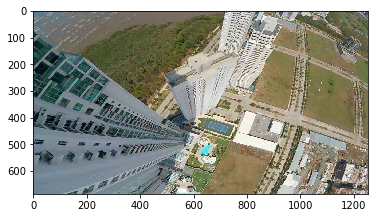

In [6]:
%pylab inline  
import skimage.io as skio

image = skio.imread('opt.gif')
plt.imshow(image)

La imagen de Scikit almacenará esta imagen como una matriz numpy. Como se trata de una imagen en color, esperamos que la imagen tenga tres dimensiones: dos dimensiones espaciales para las coordenadas x,y de los píxeles y cuatro coordenadas de color para los canales rojo verde, azul y alfa (opacidad) del color. Por ejemplo.

    I(x,y,r,g,b) = (200, 400, 0.5, 0.2, 0.7, 1.0)
    
Significaría que el píxel en la posición `x = 200, y = 400` tiene un color rgb de (0.5, 0.2, 0.7) y tiene una opacidad de 1.0. La opacidad es una especie de unidad extraña; algunas imágenes en color se almacenan como tres canales, pero algunas se almacenan con este cuarto canal de opacidad. Scikit-image básicamente ignora la opacidad, y tú también puedes hacerlo para este ejemplo. Podemos verificar las dimensiones y la forma de la imagen fácilmente en `numpy`.

In [4]:
'shape = %s   dimensions = %s' % (image.shape, image.ndim)

'shape = (686, 1255, 3)   dimensions = 3'

### canal 1 -escala de grises 


Podemos mapear fácilmente el espacio de color de 3 canales en un espacio de brillo / escala de grises de 1 canal. Cada color se asigna a un tono de gris usando una transformación estándar de color-2-gris (http://www.poynton.com/PDFs/ColorFAQ.pdf). Scikit-image lo hace muy fácil a través de su módulo `skcolor`. Para operaciones en el procesamiento de imágenes, a veces es ventajoso trabajar con imágenes de 1 canal / gris, y algunas veces con imágenes de 3 canales / rgb.

In [8]:
import skimage.color as skcolor

grayimage = skcolor.rgb2gray(image)
plt.imshow(grayimage)
plt.title('1 channel image');
'shape = %s   dimensions = %s' % (grayimage.shape, grayimage.ndim)

NameError: name 'image' is not defined


Probablemente estés pensando "hey, esto no es gris". De hecho, el gris es solo un mapa de color escalar. El mapa de color utilizado por matplotlib por defecto no es tan útil, y es por eso que la imagen de arriba todavía parece coloreada. ** Estos son COLORES FALSOS. ** Tales mapas de colores falsos a menudo se usan en imágenes "coloridas" de la NASA. Matplotlib tiene una gran cantidad de mapas de color integrados (http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

Vamos a ver la imagen en color gris

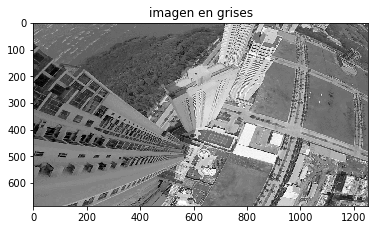

In [19]:
plt.imshow(grayimage, cmap='gray')
plt.title('imagen en grises');

### Histograma 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 686 x 1255)
  '(shape is %d x %d)' % inp.shape[::-1])


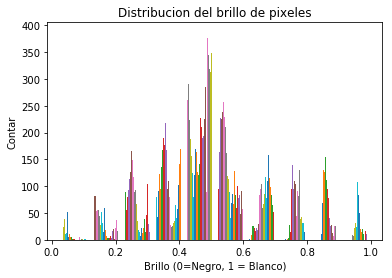

In [29]:
plt.hist(grayimage)
plt.xlabel('Brillo (0=Negro, 1 = Blanco)')
plt.ylabel('Contar')
plt.title('Distribucion del brillo de pixeles');